<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df['WorkLoc'].isnull().value_counts()
val = df['WorkLoc'].value_counts()[df['WorkLoc'].value_counts()==df['WorkLoc'].value_counts().max()].index[0]
print(val)
df['WorkLoc'].fillna(val,inplace=True)

Office


In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 6 to 11384
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              1008 non-null   int64  
 1   MainBranch              1008 non-null   object 
 2   Hobbyist                1008 non-null   object 
 3   OpenSourcer             1008 non-null   object 
 4   OpenSource              1008 non-null   object 
 5   Employment              1008 non-null   object 
 6   Country                 1008 non-null   object 
 7   Student                 1008 non-null   object 
 8   EdLevel                 1008 non-null   object 
 9   UndergradMajor          1008 non-null   object 
 10  EduOther                1008 non-null   object 
 11  OrgSize                 1008 non-null   object 
 12  DevType                 1008 non-null   object 
 13  YearsCode               1008 non-null   object 
 14  Age1stCode              1008 non-null  

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


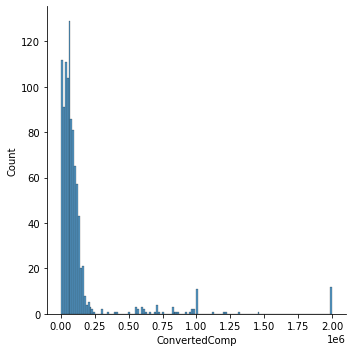

In [6]:
# your code goes here
import seaborn as sns
data = df['ConvertedComp'].dropna(axis=0)
sns.displot(data)

Plot the histogram for the column `ConvertedComp`.


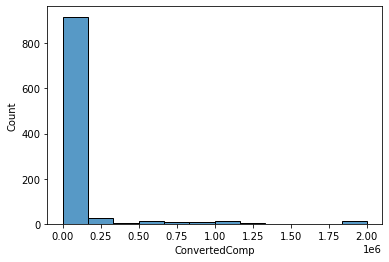

In [7]:
# your code goes here
sns.histplot(data,bins=12)

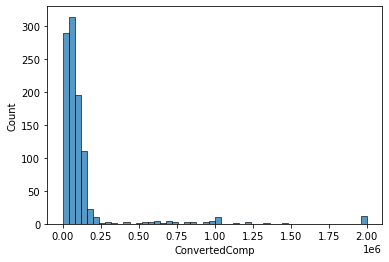

In [8]:
sns.histplot(data,bins=50)

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
data.median()

65537.5

How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
Gender = df['Gender'].dropna(axis=0)
Gender.value_counts()['Man']

962

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
CompGend = df[df['Gender']=="Woman"]['ConvertedComp'].dropna(axis=0)
CompGend.median()

60000.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
Age = df['Age'].dropna(axis=0)
Age_summary = Age.describe()[3:]
Age_summary.index = ['Min','Q1','Median','Q3','Max']
Age_summary

Min       19.0
Q1        26.0
Median    29.0
Q3        34.0
Max       63.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


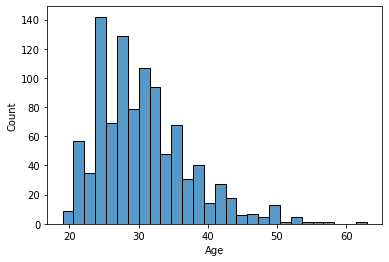

In [13]:
# your code goes here
sns.histplot(Age)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


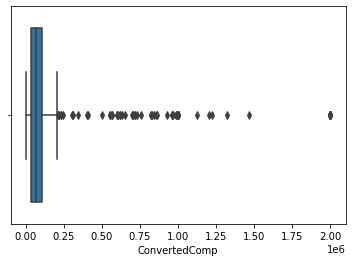

In [14]:
# your code goes here
Comp = df['ConvertedComp'].dropna(axis=0)
sns.boxplot(x=Comp)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
import numpy as np
upper_quartile = np.percentile(Comp, 75)
lower_quartile = np.percentile(Comp, 25)

iqr = upper_quartile - lower_quartile
iqr

70842.5

Find out the upper and lower bounds.


In [16]:
# your code goes here
upper_whisker = Comp[Comp<=upper_quartile+1.5*iqr].max()
lower_whisker = Comp[Comp>=lower_quartile-1.5*iqr].min()
print(lower_whisker,upper_whisker)

0.0 205000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# your code goes here
outlier = Comp[Comp>upper_whisker]
len(outlier)

71

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [22]:
# your code goes here
final_1 = df[df['ConvertedComp']<=upper_whisker]
final_df = final_1[final_1['ConvertedComp']>=lower_whisker]
final_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
6,20,"I am not primarily a developer, but I write co...",No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Lithuania,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",...,Not applicable - I did not use Stack Overflow ...,Tech articles written by other developers,38.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
15,39,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,42.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
17,44,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,43.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
36,83,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Industry news about technologies you're intere...,22.0,Man,No,Straight / Heterosexual,South Asian,No,Appropriate in length,Neither easy nor difficult
47,104,I am a developer by profession,Yes,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.057366,-0.065603,-0.060420,-0.038389,0.027928
CompTotal,-0.057366,1.000000,-0.028490,-0.006841,-0.039165,0.012503
ConvertedComp,-0.065603,-0.028490,1.000000,0.102571,-0.012538,0.109655
WorkWeekHrs,-0.060420,-0.006841,0.102571,1.000000,0.082863,0.040690
CodeRevHrs,-0.038389,-0.039165,-0.012538,0.082863,1.000000,-0.007431
Age,0.027928,0.012503,0.109655,0.040690,-0.007431,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
